## Perturbation of sequences
### Dataset: WIV04 
### Number of sequences = 
### Model: VirProBERT (CoV-S-UniRef90, CoV-S-UniRef90-aligned) 

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(os.path.join(os.getcwd(), ".."))
sys.path

['/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/perturbation/wiv04',
 '/opt/conda/lib/python38.zip',
 '/opt/conda/lib/python3.8',
 '/opt/conda/lib/python3.8/lib-dynload',
 '',
 '/home/blessyantony/.local/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages/IPython/extensions',
 '/home/blessyantony/.ipython',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/perturbation/wiv04/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/perturbation/wiv04/../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/perturbation/wiv04/..']

In [2]:
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import re

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
cmap = sns.color_palette("vlag", as_cmap=True)

from Bio import SeqIO
from Bio.Seq import Seq
from Bio import motifs


In [3]:
human_label = "Human"
perturbation_processed_output_file_path = os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/coronaviridae_s_prot_perturbation/20240320/WIV04/cov-S-multi-aligned-transfer_learning_mlm_fnn_2l_lr1e-4/processed/tl_tf_multi_aligned_sarscov2-S-WIV04ref_aligned.csv_WIV04.csv")

In [4]:
perturbed_output_df = pd.read_csv(perturbation_processed_output_file_path)
print(perturbed_output_df.shape)

(31826, 13)


In [5]:
perturbed_output_df.head()

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,uniref90_id,y_true,orig_token,perturb_pos,new_token
0,0.000075,0.000587,0.482724,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,G,2158,Y
1,0.000059,0.000598,0.494173,0.001364,0.000915,0.114727,0.225010,0.163154,WIV04,Human,L,105,S
2,0.000075,0.000587,0.482724,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,V,1448,M
3,0.000075,0.000587,0.482724,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,K,1494,S
4,0.000075,0.000587,0.482724,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,D,1752,Q


In [6]:
orig_seq_df = perturbed_output_df[perturbed_output_df["orig_token"] == perturbed_output_df["new_token"]]
orig_seq_df

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,uniref90_id,y_true,orig_token,perturb_pos,new_token
13230,0.000075,0.000587,0.482724,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,M,14,M


In [ ]:
orig_seq = orig_seq_df[]

In [7]:
orig_seq_df_pred = orig_seq_df[human_label].values[0]
orig_seq_df_pred

0.20868117

In [8]:
pred_diff_col = f"{human_label}_pred_diff"
perturbed_output_df[pred_diff_col] = orig_seq_df_pred - perturbed_output_df[human_label]
perturbed_output_df[f"abs_{pred_diff_col}"] = perturbed_output_df[pred_diff_col].abs()
perturbed_output_df.head()

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,uniref90_id,y_true,orig_token,perturb_pos,new_token,Human_pred_diff,abs_Human_pred_diff
0,0.000075,0.000587,0.482724,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,G,2158,Y,0.000000,0.000000
1,0.000059,0.000598,0.494173,0.001364,0.000915,0.114727,0.225010,0.163154,WIV04,Human,L,105,S,-0.016328,0.016328
2,0.000075,0.000587,0.482724,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,V,1448,M,0.000000,0.000000
3,0.000075,0.000587,0.482724,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,K,1494,S,0.000000,0.000000
4,0.000075,0.000587,0.482724,0.001757,0.001058,0.114959,0.208681,0.190159,WIV04,Human,D,1752,Q,0.000000,0.000000


### Distribution of prediction difference values

/tmp/ipykernel_1176204/2860024834.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(perturbed_output_df["Human_pred_diff"])


<Figure size 432x288 with 0 Axes>

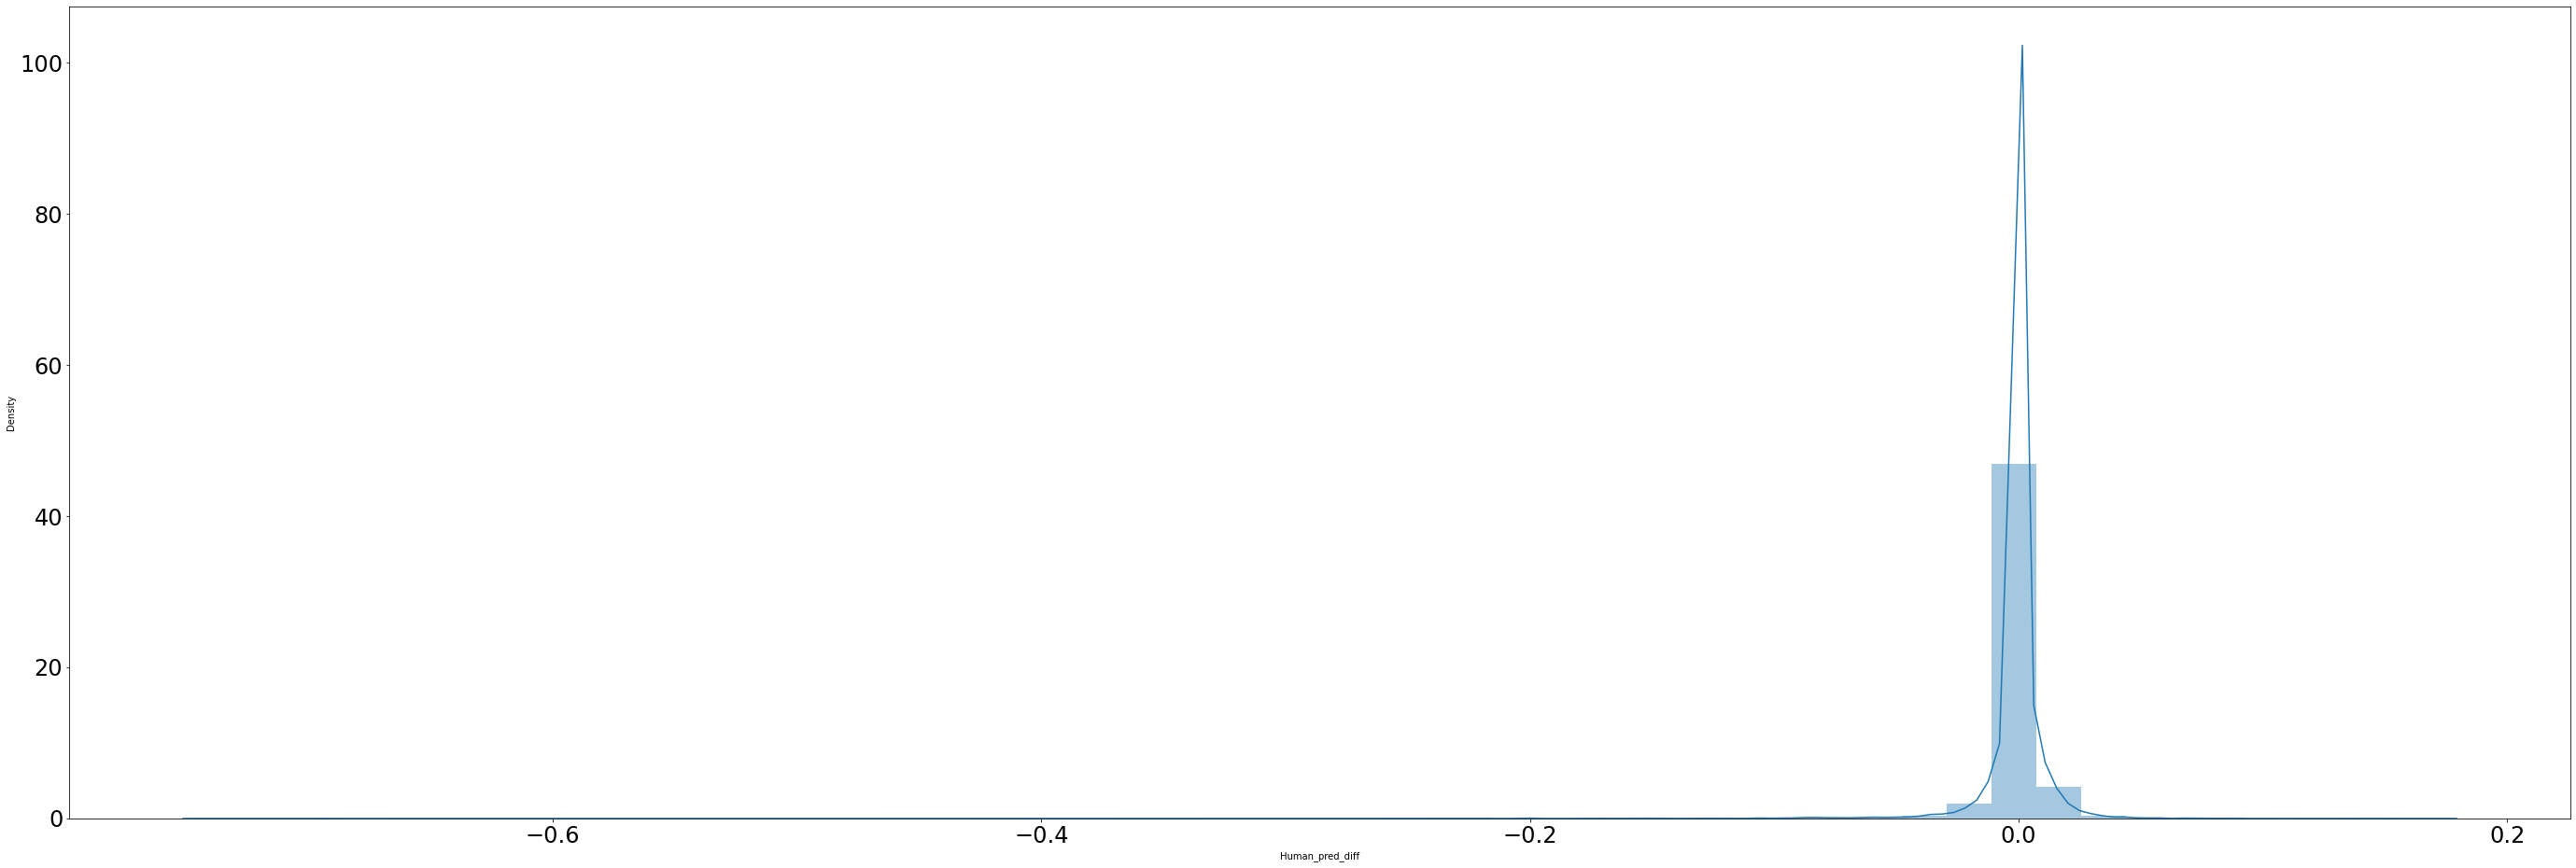

In [9]:
plt.clf()
plt.figure(figsize=(48, 16))
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
sns.distplot(perturbed_output_df["Human_pred_diff"])
plt.show()

In [10]:
n_bins = 12
n = perturbed_output_df.shape[0]
freq, bins = np.histogram(perturbed_output_df[pred_diff_col], bins=n_bins)
hist_map = []
for i in range(n_bins):
    hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    
hist_df = pd.DataFrame(hist_map)
hist_df.head(20)

,start,end,count,percentage
0,-0.744596,-0.668173,5,0.015710
1,-0.668173,-0.591750,2,0.006284
2,-0.591750,-0.515328,1,0.003142
3,-0.515328,-0.438905,2,0.006284
4,-0.438905,-0.362482,3,0.009426
5,-0.362482,-0.286059,6,0.018853
6,-0.286059,-0.209636,10,0.031421
7,-0.209636,-0.133213,37,0.116257
8,-0.133213,-0.056790,174,0.546723
9,-0.056790,0.019632,31001,97.407780


### Top 10 perturbations with highest change in prediction probability

In [11]:
perturbed_output_df.sort_values(by="abs_Human_pred_diff", ascending=False).head(10)


,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,uniref90_id,y_true,orig_token,perturb_pos,new_token,Human_pred_diff,abs_Human_pred_diff
18715,0.000008,0.001149,0.036094,0.000041,0.000161,0.003146,0.953277,0.006124,WIV04,Human,E,1300,X,-0.744596,0.744596
29508,0.000008,0.001267,0.042944,0.000045,0.000173,0.004191,0.944884,0.006487,WIV04,Human,N,1303,X,-0.736203,0.736203
21252,0.000013,0.001175,0.060888,0.000085,0.000218,0.005932,0.920614,0.011074,WIV04,Human,G,1301,X,-0.711933,0.711933
25272,0.000015,0.001009,0.073336,0.000112,0.000232,0.007247,0.903924,0.014124,WIV04,Human,G,1298,X,-0.695243,0.695243
15991,0.000015,0.001094,0.074143,0.000107,0.000237,0.007343,0.903106,0.013955,WIV04,Human,V,1299,X,-0.694425,0.694425
28423,0.000021,0.001011,0.127156,0.000202,0.000296,0.013730,0.832663,0.024920,WIV04,Human,C,1304,X,-0.623982,0.623982
21427,0.000021,0.001076,0.131763,0.000204,0.000341,0.015658,0.825012,0.025925,WIV04,Human,F,1302,X,-0.616331,0.616331
7326,0.000023,0.000847,0.181454,0.000288,0.000359,0.023536,0.752656,0.040837,WIV04,Human,T,1101,X,-0.543975,0.543975
7588,0.000026,0.000867,0.202863,0.000349,0.000420,0.027761,0.718863,0.048851,WIV04,Human,Q,1100,X,-0.510182,0.510182
31413,0.000029,0.000901,0.236950,0.000410,0.000502,0.035260,0.667658,0.058290,WIV04,Human,K,1103,X,-0.458977,0.458977


In [12]:
token_positions = perturbed_output_df["perturb_pos"].unique()
token_positions = [x for x in token_positions]
token_positions.sort()
len(token_positions)

1273

In [13]:
df = perturbed_output_df.pivot(columns="perturb_pos", index="new_token", values=pred_diff_col)
df[token_positions]

perturb_pos,14,15,16,17,18,19,20,21,22,23,...,2406,2407,2408,2409,2410,2411,2412,2413,2414,2415
new_token,,,,,,,,,,,,,,,,,,,,,
A,-0.000752,-0.006145,0.005365,0.004080,0.011039,0.005872,0.010587,-0.002021,-0.043432,-0.004483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,0.003355,0.003957,0.022735,0.021554,0.031499,0.035648,0.030264,0.018772,-0.006906,0.012278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C,0.000779,-0.003483,0.016950,0.012287,0.024790,0.026942,0.022068,0.008908,-0.025238,-0.001143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D,0.014996,0.015189,0.033785,0.028914,0.038244,0.045070,0.040944,0.030681,0.010471,0.021578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.018113,0.018095,0.035440,0.031005,0.041576,0.048903,0.043926,0.033996,0.018562,0.026168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F,0.014428,NaN,0.025659,NaN,0.013018,-0.001370,0.009122,0.003243,-0.032322,0.008769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G,-0.001590,-0.005328,0.010786,0.004957,0.014575,0.016629,0.010718,-0.002151,-0.042925,-0.006387,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
H,0.009972,0.011587,0.026604,0.025827,0.036016,0.041581,0.037316,0.028234,0.005401,0.016546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
I,-0.004088,-0.017070,0.004449,-0.001608,0.016823,0.003005,0.009245,-0.004316,-0.040363,-0.006080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 432x288 with 0 Axes>

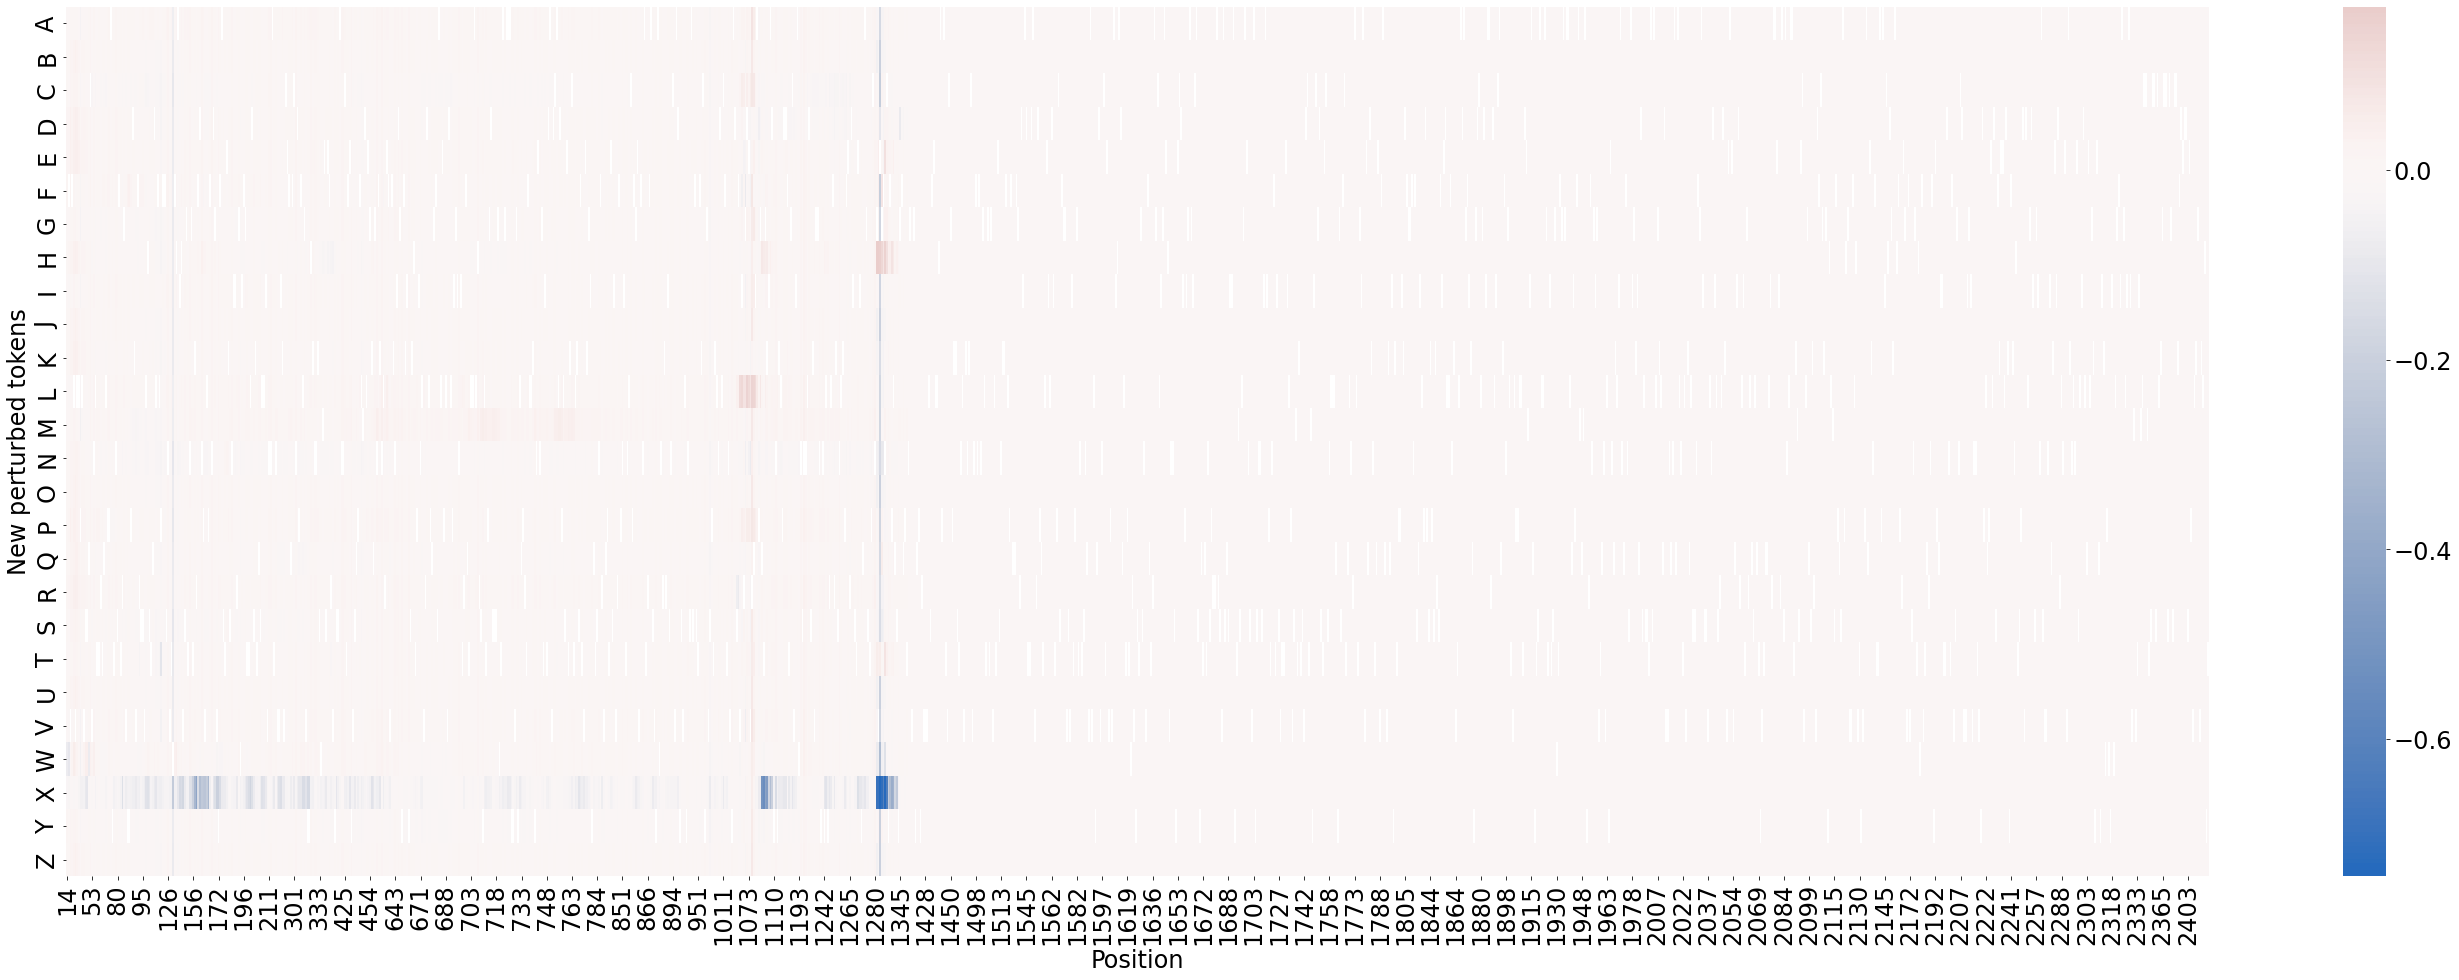

In [14]:
plt.clf()
plt.figure(figsize=(48, 16))
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
# plt.rcParams['figure.autolayout'] = True
ax = sns.heatmap(df, cmap=cmap, center=0)
plt.xlabel('Position', fontsize=24)
plt.ylabel('New perturbed tokens', fontsize=24)
plt.show()

In [15]:
df.mean(axis=0)

perturb_pos
14     -0.000182
15     -0.004444
16      0.017784
17      0.015513
18      0.026079
          ...   
2411    0.000000
2412    0.000000
2413    0.000000
2414    0.000000
2415    0.000000
Length: 1273, dtype: float64

<Figure size 432x288 with 0 Axes>

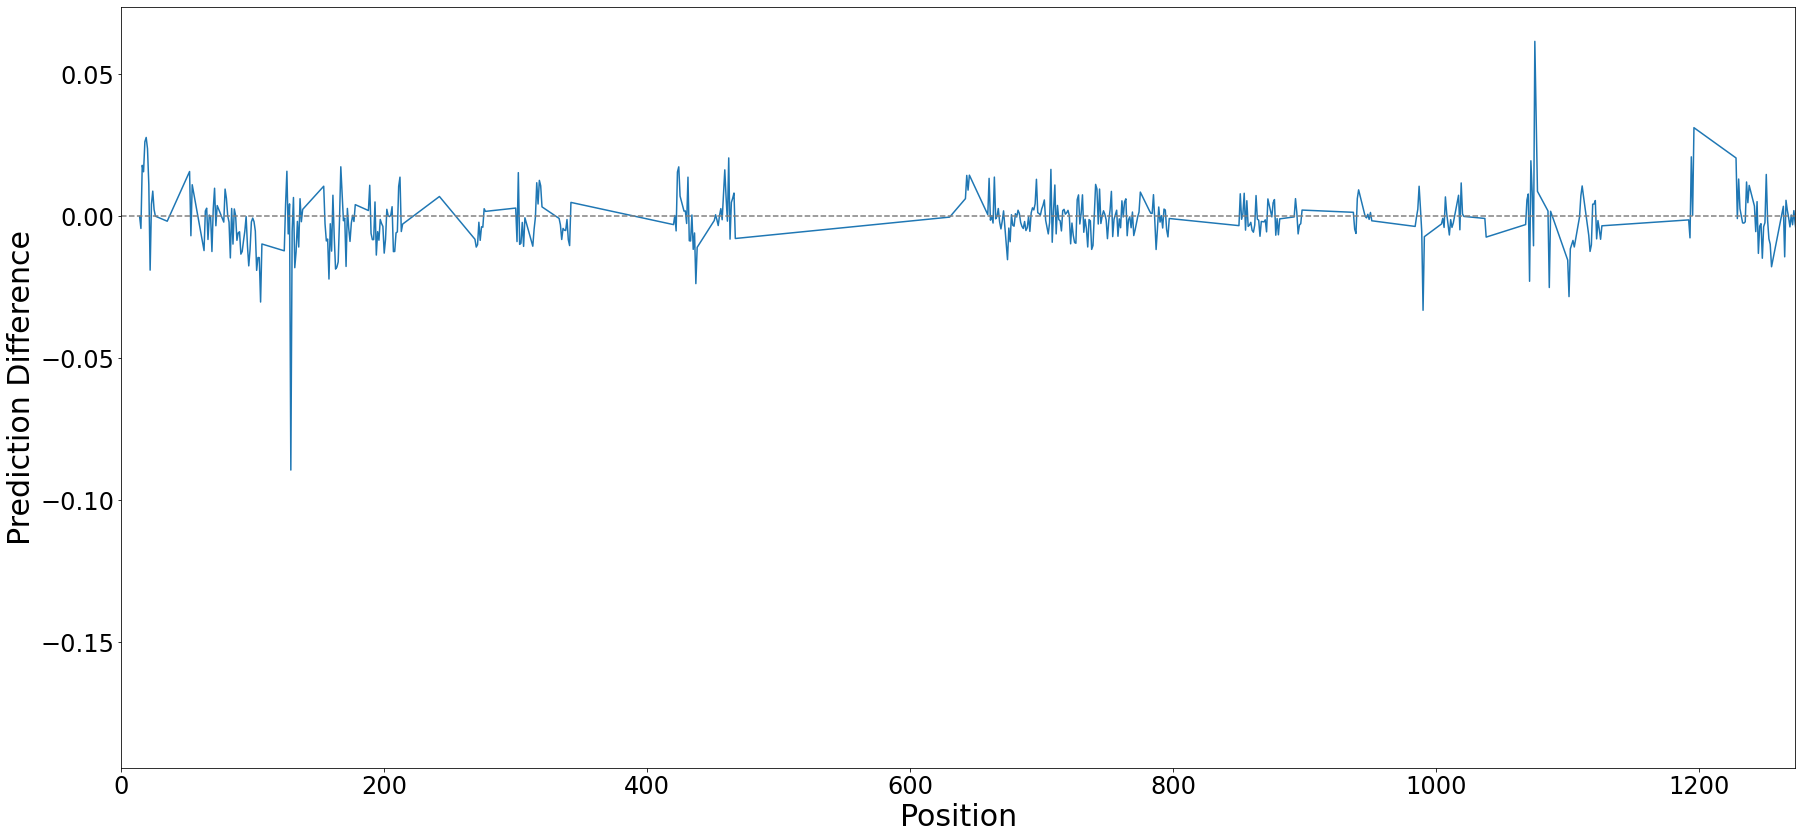

In [16]:
plt.clf()
plt.figure(figsize=(30, 14))
ax = sns.lineplot(df.mean(axis=0))
ax.axhline(0.0, color="gray", linestyle="--")
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.xlabel('Position', fontsize=30)
plt.ylabel('Prediction Difference', fontsize=30)
ax.set_xlim(0, 1273)
plt.show()